In [ ]:
【Task 3】
用逻辑回归、svm和决策树；随机森林和XGBoost进行模型构建，评分方式任意，如准确率等。（不需要考虑模型调参）


In [1]:
import numpy as np
import pandas as pd

#导入处理后的数据，4754*81
data = pd.read_csv('data/data_81col.csv')

In [4]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 82 columns):
Unnamed: 0                                    4754 non-null int64
low_volume_percent                            4754 non-null float64
middle_volume_percent                         4754 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4754 non-null float64
trans_activity_month                          4754 non-null float64
trans_activity_day                            4754 non-null float64
transd_mcc                                    4754 non-null float64
trans_days_interval_filter                    4754 non-null float64
trans_days_interval                           4754 non-null float64
regional_mobility                             4754 non-null float64
student_feature                               4754 non-null float64
repayment_capability                          4754 non-null int64
is_high_user   

In [6]:
# 生成训练集和测试集
from sklearn.model_selection import train_test_split
y = data['status']
X = data.drop(['status'],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2018)

In [8]:
# 决策树 随机森林 和 XGBOOST 因为决策树不需要做特征标准化
#导入相关算法
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
#导入模型评估分数，因为是分类，所以采用 accuracy_score  f1_score  画出 PR曲线图 RCO曲线  混淆矩阵 
from sklearn.metrics import accuracy_score,f1_score,precision_recall_curve,roc_curve,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


决策树的准确率： 0.6888577435178697
决策树的 F1 SCORE 0.3884297520661157
              precision    recall  f1-score   support

           低       0.79      0.79      0.79      1068
           高       0.38      0.39      0.39       359

    accuracy                           0.69      1427
   macro avg       0.59      0.59      0.59      1427
weighted avg       0.69      0.69      0.69      1427

[[842 226]
 [218 141]]


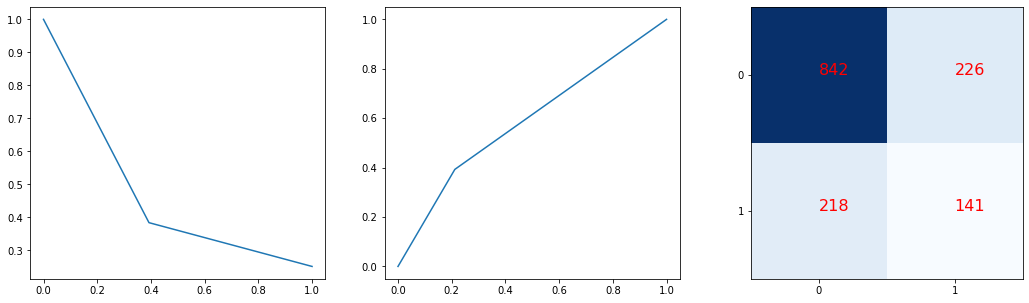

In [28]:
#决策树
dt = DecisionTreeClassifier(random_state=2018)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
print('决策树的准确率：',accuracy_score(y_test,dt_predict))
print('决策树的 F1 SCORE',f1_score(y_test,dt_predict))
print(classification_report(y_test,dt_predict,target_names =['低', '高'] ))

precision_dt,recall_dt,_ = precision_recall_curve(y_test,dt_predict)
fpr_dt,tpr_dt,_ = roc_curve(y_test,dt_predict)
cm = confusion_matrix(y_test,dt_predict)
print(cm)

plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(recall_dt,precision_dt)
plt.subplot(132)
plt.plot(fpr_dt,tpr_dt)
plt.subplot(133)
plt.imshow(cm,cmap=plt.cm.Blues)
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(i,j,cm[j,i],color='red',fontsize=16)
plt.xticks([0,1],[0,1])
plt.yticks([0,1],[0,1])
plt.grid(False)
plt.show()


随机森林的准确率： 0.7841625788367204
随机森林的 F1 SCORE 0.39843749999999994
              precision    recall  f1-score   support

           低       0.80      0.95      0.87      1068
           高       0.67      0.28      0.40       359

    accuracy                           0.78      1427
   macro avg       0.73      0.62      0.63      1427
weighted avg       0.77      0.78      0.75      1427

[[1017   51]
 [ 257  102]]


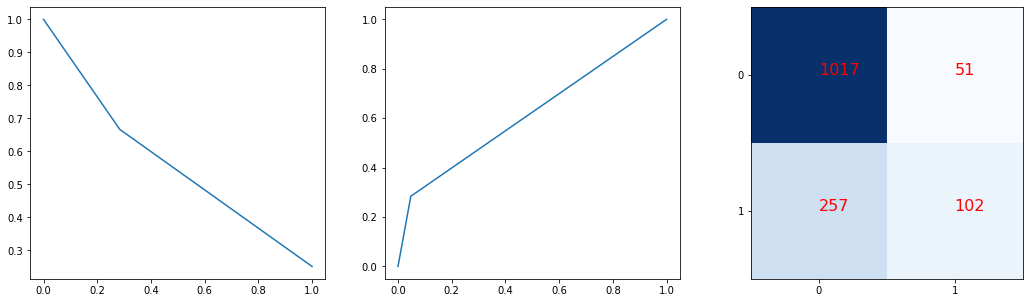

In [29]:
#随机森林
rfc = RandomForestClassifier(n_estimators=100,random_state=2018)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
print('随机森林的准确率：',accuracy_score(y_test,rfc_predict))
print('随机森林的 F1 SCORE',f1_score(y_test,rfc_predict))
print(classification_report(y_test,rfc_predict,target_names =['低', '高'] ))

precision_rfc,recall_rfc,_ = precision_recall_curve(y_test,rfc_predict)
fpr_rfc,tpr_rfc,_ = roc_curve(y_test,rfc_predict)
cm = confusion_matrix(y_test,rfc_predict)
print(cm)

plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(recall_rfc,precision_rfc)
plt.subplot(132)
plt.plot(fpr_rfc,tpr_rfc)
plt.subplot(133)
plt.imshow(cm,cmap=plt.cm.Blues)
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(i,j,cm[j,i],color='red',fontsize=16)
plt.xticks([0,1],[0,1])
plt.yticks([0,1],[0,1])
plt.grid(False)
plt.show()



随机森林的准确率： 0.7792571829011913
随机森林的 F1 SCORE 0.45217391304347826
              precision    recall  f1-score   support

           低       0.81      0.92      0.86      1068
           高       0.60      0.36      0.45       359

    accuracy                           0.78      1427
   macro avg       0.71      0.64      0.66      1427
weighted avg       0.76      0.78      0.76      1427

[[982  86]
 [229 130]]


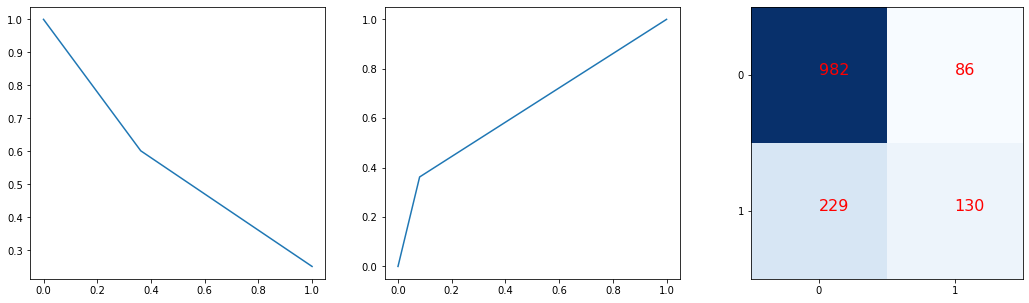

In [30]:
#GBDT
gbc = GradientBoostingClassifier(n_estimators=100,random_state=2018)
gbc.fit(X_train,y_train)
gbc_predict = gbc.predict(X_test)
print('随机森林的准确率：',accuracy_score(y_test,gbc_predict))
print('随机森林的 F1 SCORE',f1_score(y_test,gbc_predict))
print(classification_report(y_test,gbc_predict,target_names =['低', '高'] ))

precision_gbc,recall_gbc,_ = precision_recall_curve(y_test,gbc_predict)
fpr_gbc,tpr_gbc,_ = roc_curve(y_test,gbc_predict)
cm = confusion_matrix(y_test,gbc_predict)
print(cm)

plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(recall_gbc,precision_gbc)
plt.subplot(132)
plt.plot(fpr_gbc,tpr_gbc)
plt.subplot(133)
plt.imshow(cm,cmap=plt.cm.Blues)
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(i,j,cm[j,i],color='red',fontsize=16)
plt.xticks([0,1],[0,1])
plt.yticks([0,1],[0,1])
plt.grid(False)
plt.show()



随机森林的准确率： 0.751927119831815
随机森林的 F1 SCORE 0.4326923076923077
              precision    recall  f1-score   support

           低       0.81      0.88      0.84      1068
           高       0.51      0.38      0.43       359

    accuracy                           0.75      1427
   macro avg       0.66      0.63      0.64      1427
weighted avg       0.73      0.75      0.74      1427

[[938 130]
 [224 135]]


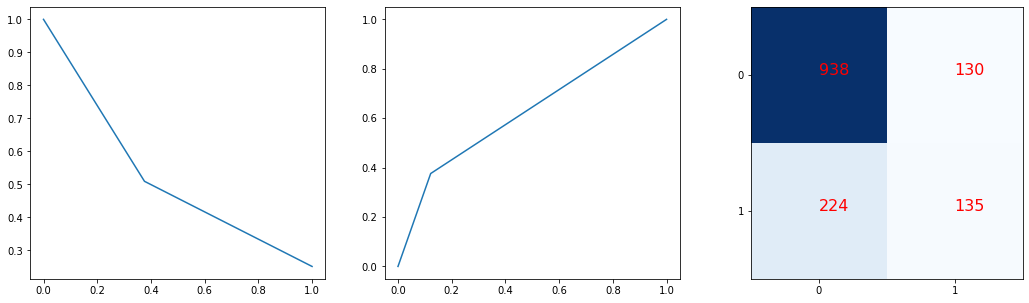

In [31]:
#adaboost
abc = AdaBoostClassifier(n_estimators=100,random_state=2018)
abc.fit(X_train,y_train)
abc_predict = abc.predict(X_test)
print('随机森林的准确率：',accuracy_score(y_test,abc_predict))
print('随机森林的 F1 SCORE',f1_score(y_test,abc_predict))
print(classification_report(y_test,abc_predict,target_names =['低', '高'] ))

precision_abc,recall_abc,_ = precision_recall_curve(y_test,abc_predict)
fpr_abc,tpr_abc,_ = roc_curve(y_test,abc_predict)
cm = confusion_matrix(y_test,abc_predict)
print(cm)

plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(recall_abc,precision_abc)
plt.subplot(132)
plt.plot(fpr_abc,tpr_abc)
plt.subplot(133)
plt.imshow(cm,cmap=plt.cm.Blues)
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(i,j,cm[j,i],color='red',fontsize=16)
plt.xticks([0,1],[0,1])
plt.yticks([0,1],[0,1])
plt.grid(False)
plt.show()



随机森林的准确率： 0.7855641205325858
随机森林的 F1 SCORE 0.4668989547038328
              precision    recall  f1-score   support

           低       0.81      0.92      0.87      1068
           高       0.62      0.37      0.47       359

    accuracy                           0.79      1427
   macro avg       0.72      0.65      0.67      1427
weighted avg       0.77      0.79      0.77      1427

[[987  81]
 [225 134]]


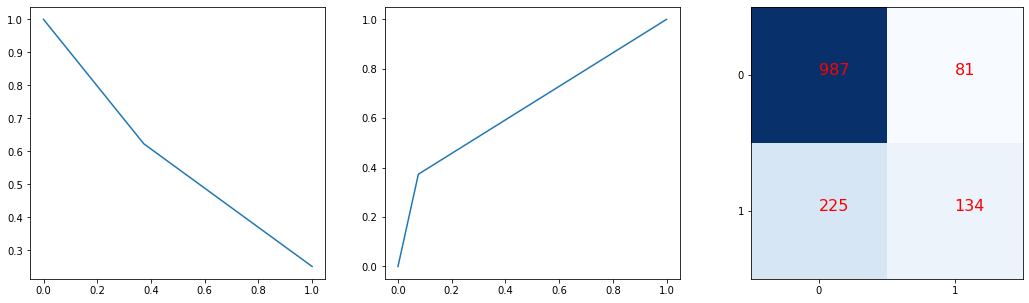

In [33]:
#xgboost
xgb = XGBClassifier(n_estimators=100,random_state=2018)
xgb.fit(X_train,y_train)
xgb_predict = xgb.predict(X_test)
print('随机森林的准确率：',accuracy_score(y_test,xgb_predict))
print('随机森林的 F1 SCORE',f1_score(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict,target_names =['低', '高'] ))

precision_xgb,recall_xgb,_ = precision_recall_curve(y_test,xgb_predict)
fpr_xgb,tpr_xgb,_ = roc_curve(y_test,xgb_predict)
cm = confusion_matrix(y_test,xgb_predict)
print(cm)

plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(recall_xgb,precision_xgb)
plt.subplot(132)
plt.plot(fpr_xgb,tpr_xgb)
plt.subplot(133)
plt.imshow(cm,cmap=plt.cm.Blues)
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(i,j,cm[j,i],color='red',fontsize=16)
plt.xticks([0,1],[0,1])
plt.yticks([0,1],[0,1])
plt.grid(False)
plt.show()



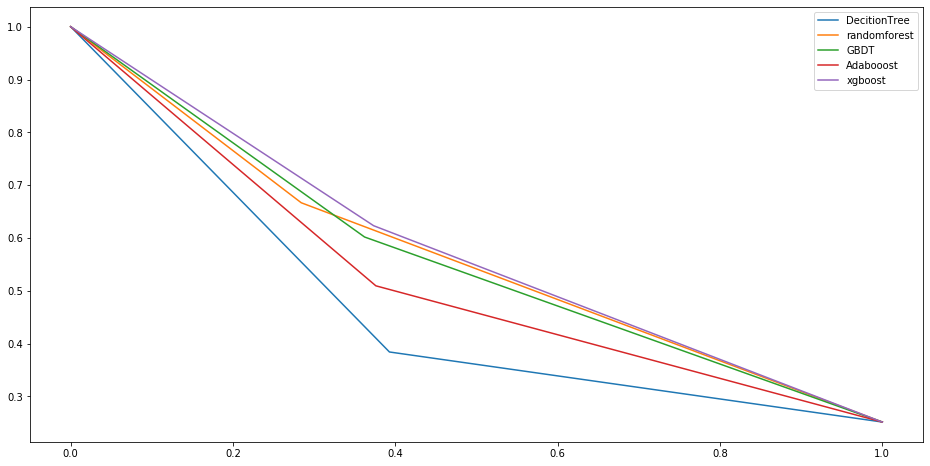

In [39]:
plt.figure(figsize=(16,8))
plt.plot(recall_dt,precision_dt,label='DecitionTree')
plt.plot(recall_rfc,precision_rfc,label='randomforest')
plt.plot(recall_gbc,precision_gbc,label='GBDT')
plt.plot(recall_abc,precision_abc,label='Adabooost')
plt.plot(recall_xgb,precision_xgb,label='xgboost')
plt.legend(loc='upper right')
plt.show()

In [41]:
#特征标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [48]:
#GridSearchCV  逻辑回归 和 SVM  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


最优参数 {'C': 0.01, 'random_state': 2018}
最高分数 0.7935076645626691
逻辑回归的准确率： 0.7890679747722494
逻辑回归的 F1 SCORE 0.4331450094161959
              precision    recall  f1-score   support

           低       0.81      0.95      0.87      1068
           高       0.67      0.32      0.43       359

    accuracy                           0.79      1427
   macro avg       0.74      0.63      0.65      1427
weighted avg       0.77      0.79      0.76      1427

[[1011   57]
 [ 244  115]]


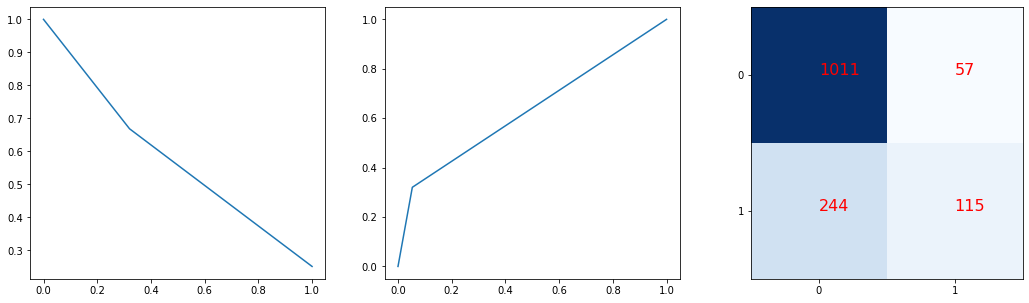

In [50]:
#逻辑回归
params = {'C':[0.01,0.1,1.0,10],'random_state':[2018]}
clr = GridSearchCV(LogisticRegression(),params,cv=5,scoring='accuracy')
clr.fit(X_train_scaled,y_train)
print('最优参数',clr.best_params_)
print('最高分数',clr.best_score_)
best_model_lr = clr.best_estimator_
lr_predict = best_model_lr.predict(X_test_scaled)
print('逻辑回归的准确率：',accuracy_score(y_test,lr_predict))
print('逻辑回归的 F1 SCORE',f1_score(y_test,lr_predict))
print(classification_report(y_test,lr_predict,target_names =['低', '高'] ))

precision_lr,recall_lr,_ = precision_recall_curve(y_test,lr_predict)
fpr_lr,tpr_lr,_ = roc_curve(y_test,lr_predict)
cm = confusion_matrix(y_test,lr_predict)
print(cm)

plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(recall_lr,precision_lr)
plt.subplot(132)
plt.plot(fpr_lr,tpr_lr)
plt.subplot(133)
plt.imshow(cm,cmap=plt.cm.Blues)
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(i,j,cm[j,i],color='red',fontsize=16)
plt.xticks([0,1],[0,1])
plt.yticks([0,1],[0,1])
plt.grid(False)
plt.show()


最优参数 {'C': 1.0, 'random_state': 2018}
最高分数 0.7892996693718064
逻辑回归的准确率： 0.7771548703573932
逻辑回归的 F1 SCORE 0.33193277310924374
              precision    recall  f1-score   support

           低       0.79      0.96      0.87      1068
           高       0.68      0.22      0.33       359

    accuracy                           0.78      1427
   macro avg       0.73      0.59      0.60      1427
weighted avg       0.76      0.78      0.73      1427

[[1030   38]
 [ 280   79]]


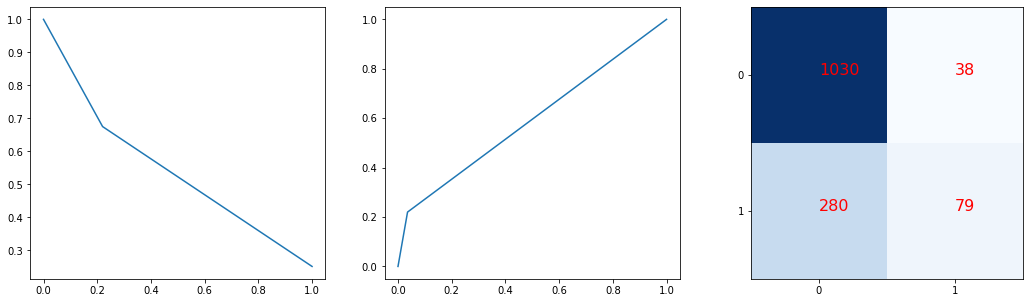

In [51]:
#SVC
params = {'C':[0.01,0.1,1.0,10],'random_state':[2018]}
csvc = GridSearchCV(SVC(),params,cv=5,scoring='accuracy')
csvc.fit(X_train_scaled,y_train)
print('最优参数',csvc.best_params_)
print('最高分数',csvc.best_score_)
best_model_svc = csvc.best_estimator_
svc_predict = best_model_svc.predict(X_test_scaled)
print('逻辑回归的准确率：',accuracy_score(y_test,svc_predict))
print('逻辑回归的 F1 SCORE',f1_score(y_test,svc_predict))
print(classification_report(y_test,svc_predict,target_names =['低', '高'] ))

precision_svc,recall_svc,_ = precision_recall_curve(y_test,svc_predict)
fpr_svc,tpr_svc,_ = roc_curve(y_test,svc_predict)
cm = confusion_matrix(y_test,svc_predict)
print(cm)

plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(recall_svc,precision_svc)
plt.subplot(132)
plt.plot(fpr_svc,tpr_svc)
plt.subplot(133)
plt.imshow(cm,cmap=plt.cm.Blues)
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(i,j,cm[j,i],color='red',fontsize=16)
plt.xticks([0,1],[0,1])
plt.yticks([0,1],[0,1])
plt.grid(False)
plt.show()


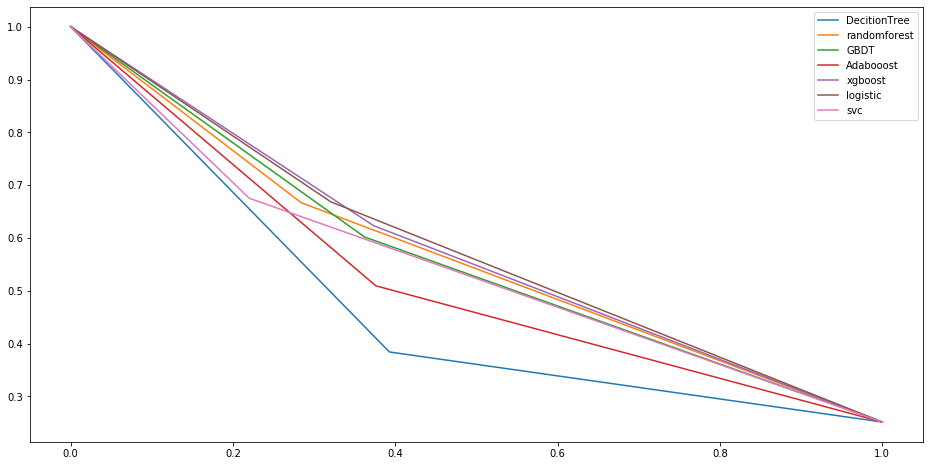

In [52]:
plt.figure(figsize=(16,8))
plt.plot(recall_dt,precision_dt,label='DecitionTree')
plt.plot(recall_rfc,precision_rfc,label='randomforest')
plt.plot(recall_gbc,precision_gbc,label='GBDT')
plt.plot(recall_abc,precision_abc,label='Adabooost')
plt.plot(recall_xgb,precision_xgb,label='xgboost')
plt.plot(recall_lr,precision_lr,label='logistic')
plt.plot(recall_svc,precision_svc,label='svc')
plt.legend(loc='upper right')
plt.show()